**Mount colab notebook to Drive**

In [1]:
# Mounting colab notebook to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Downloading gplearn and relevant packages*

In [2]:
# Installing gplearn
# https://gplearn.readthedocs.io/en/stable/installation.html
!pip install gplearn

*Importing relevant modules/functions*

In [3]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
import matplotlib as plt
import numpy as np
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


*Verify working directory*

In [4]:
input_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/'
os.chdir(input_path)
!pwd

/content/drive/My Drive/Symbolic-Regressor/Feynman Local


*Function Deposit*

In [5]:
# Function deposit
def get_y_values(x_values):
  y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 1] + 3
  return y_values

def get_noisy_y_values(x_values):
  noisy_y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 2] + 3
  return noisy_y_values

Perfect data - generation, plotting, symbolic regression

In [6]:
#Generating data sets compatible with gplearn

x_values = np.random.randn(10000, 2)

y_values = get_y_values(x_values)

np.save('x_values_gplearn.npy',x_values)
np.savetxt('x_values_gplearn.txt',x_values,delimiter=' ')

np.save('y_values_gplearn.npy',y_values)
np.savetxt('y_values_gplearn.txt',y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_data_gplearn.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 1][r]} {y_values[r]}\n')

In [7]:
x_values = np.random.randn(10000, 3)

y_values = x_values[:, 1]

print(x_values)
print(y_values)

[[ 0.06463625  0.06709908  0.28406533]
 [-1.13689581 -0.54080255  0.70240008]
 [-0.55910474 -0.01229793  0.0024629 ]
 ...
 [-0.1430747  -0.69973719  0.1692882 ]
 [-0.04288637 -0.42469926 -0.13030448]
 [-0.38775365 -0.28655117 -0.32929412]]
[ 0.06709908 -0.54080255 -0.01229793 ... -0.69973719 -0.42469926
 -0.28655117]


<ipython-input-8-123056e46845>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


             0         1         2
0     1.373667  1.713606  3.169969
1     0.290994 -1.111257  2.298875
2    -0.839757  1.875488  4.357622
3    -0.903635 -1.321257  2.791189
4     2.289049 -0.705798  1.502577
...        ...       ...       ...
9995 -0.874402 -0.285022  3.294690
9996 -0.284221  0.105573  3.194897
9997 -1.971975  0.234362  4.103169
9998 -0.164655  1.506026  3.835341
9999  0.628407  1.393789  3.382691

[10000 rows x 3 columns]


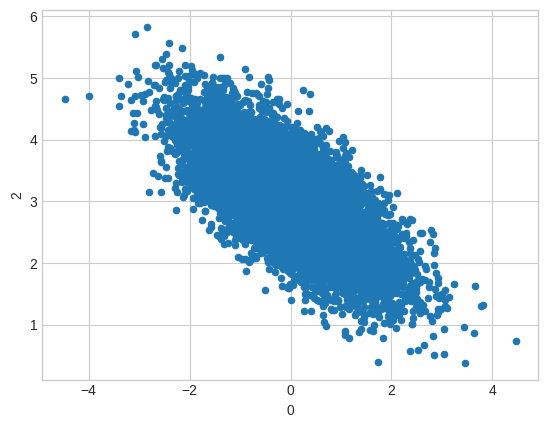

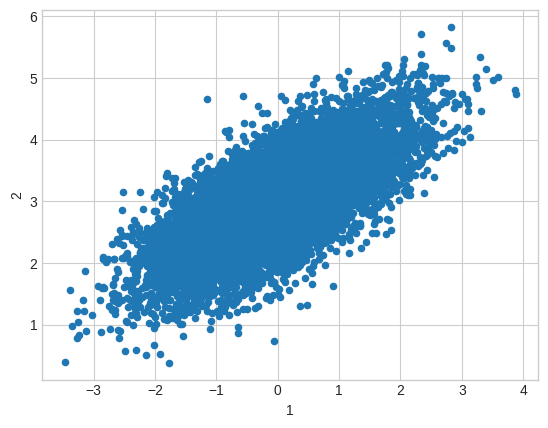

In [8]:
# Printing perfect data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_data_gplearn.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [9]:
# Running gplearn symbolic regression on perfect data (default settings)
est_gp = SymbolicRegressor(population_size=1000,
                           generations=50, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(x_values, y_values)
print(est_gp._program)

# The smaller the dataset, population_size can be increased. If the known target equation is (relatively) simple, parsimony_coefficient can be increased.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.91          38965.4       15                0                0      4.16m
div(X1, div(add(div(0.001, X1), X1), mul(mul(0.222, -0.784), sub(X0, X0))))


*Introducing noise (and unwanted variables) into the data - generation, plotting, symbolic regression*

In [10]:
#Generating noisy data sets compatible with gplearn

x_values = np.random.randn(10000, 4)

noisy_y_values = get_noisy_y_values(x_values)

mu = 0
sigma = 0.05
noise = np.random.normal(mu, sigma, 4)
noisy_x_values = x_values + noise

np.save('noisy_x_values_gplearn.npy',noisy_x_values)
np.savetxt('noisy_x_values_gplearn.txt',noisy_x_values,delimiter=' ')

np.save('noisy_y_values_gplearn.npy',noisy_y_values)
np.savetxt('noisy_y_values_gplearn.txt',noisy_y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_noisy_data_gplearn.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 2][r]} {y_values[r]}\n')

<ipython-input-11-120397eac98b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


             0         1         2
0    -0.589260 -2.412508  0.067099
1    -0.381965  0.702790 -0.540803
2    -1.425554  1.060749 -0.012298
3     1.356935  1.108030  0.107107
4     1.077137  0.447444 -0.740610
...        ...       ...       ...
9995 -0.309912 -0.394005  0.206140
9996  0.204822 -0.311661 -0.962876
9997 -0.615290 -0.653521 -0.699737
9998  0.935253  0.013196 -0.424699
9999 -0.272021 -0.378677 -0.286551

[10000 rows x 3 columns]


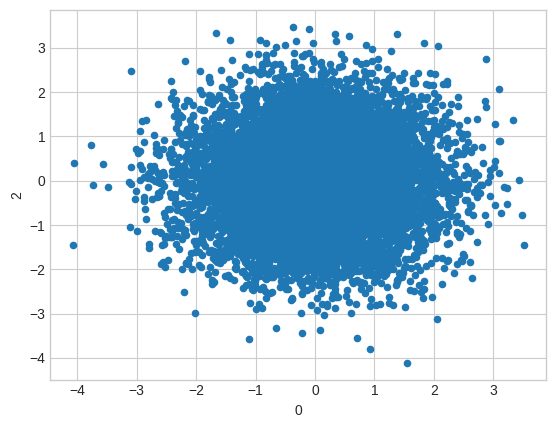

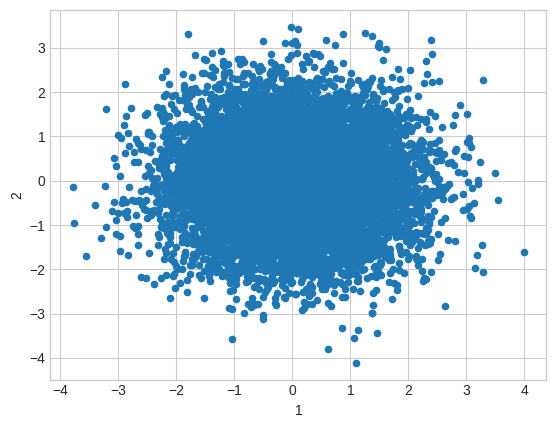

In [11]:
# Printing noisy data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_noisy_data_gplearn.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [12]:
# Running gplearn symbolic regression on perfect data (default settings)
est_gp = SymbolicRegressor(population_size=1000,
                           generations=50, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(noisy_x_values, noisy_y_values)
print(est_gp._program)

# Default configurations used, hence kwargs are not shown.
# The smaller the dataset, population_size can be increased. If the known target equation is (relatively) simple, parsimony_coefficient can be increased.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.53          57197.9        9         0.971288         0.955497      3.44m
   1     7.92           4.5544        9         0.966047          1.00267      1.18m
   2     6.83          4.56728       19         0.573537         0.558674      1.06m
   3     8.95          18.4979       11         0.569353         0.576643      1.11m
   4    10.34          3.99726       17         0.512521         0.504777      1.13m
   5     8.06          2.79105       11         0.567937          0.58938      1.04m
   6     6.17          1.47676        9          0.57099         0.581594     55.63s
   7     5.48          1.95308        7         0.572792         0.582045     51.21s
   8     5.13          2.80474        5         0.579157         0.607349  